In [1]:
#importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
#importing the image

img = cv2.imread('image.jpg')

In [3]:
#converting image into grey scale

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_eq = cv2.equalizeHist(gray)

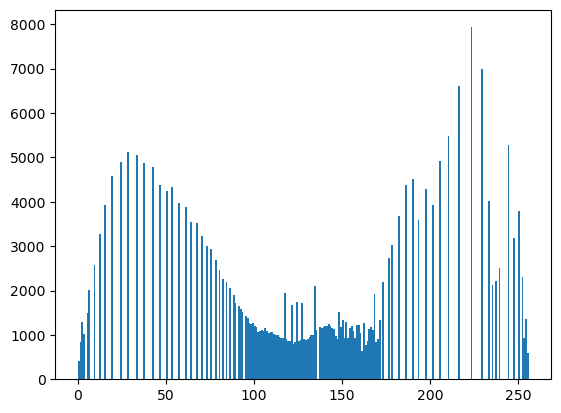

In [4]:
#plot the histogram

plt.hist(gray_eq.ravel(), 256, [0, 256])
plt.show()

In [6]:
#applying Prewitt Edge Detection

kernelx = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
kernely = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
prewittx = cv2.filter2D(gray, -1, kernelx)
prewitty = cv2.filter2D(gray, -1, kernely)
prewitt = cv2.addWeighted(prewittx, 0.5, prewitty, 0.5, 0)
cv2.imshow('Prewitt Edge Detection', prewitt)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [7]:
#applying Sobel Edge Detection

sobelx_eq = cv2.Sobel(gray_eq, cv2.CV_64F, 1, 0, ksize=5)
sobely_eq = cv2.Sobel(gray_eq, cv2.CV_64F, 0, 1, ksize=5)
sobel_eq = cv2.addWeighted(sobelx_eq, 0.5, sobely_eq, 0.5, 0)
cv2.imshow('Sobel Edge Detection - Histogram Equalized', sobel_eq)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [8]:
#applying Canny Edge Detection

canny_eq = cv2.Canny(gray_eq, 100, 200)
cv2.imshow('Canny Edge Detection - Histogram Equalized', canny_eq)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [9]:
#applying Laplacian Edge Detection

laplacian_eq = cv2.Laplacian(gray_eq, cv2.CV_64F)
cv2.imshow('Laplacian Edge Detection - Histogram Equalized', laplacian_eq)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
#Canny edge detection is a more advanced algorithm that involves several steps. It first applies a Gaussian filter to smooth the image and remove noise. 
#Then, it calculates the gradient magnitude and direction for each pixel using a Sobel or Prewitt operator. 
#Next, it uses non-maximum suppression to thin out the edges and suppress spurious responses. Finally, it applies hysteresis thresholding to determine the edges. 
#The output of Canny edge detection is a binary image with well-defined edges and minimal noise.
#Laplacian edge detection uses a second derivative filter to detect edges. The filter highlights areas of rapid intensity change in an image. 
#The output of Laplacian edge detection is a grayscale image with edges appearing as either bright or dark lines, depending on the direction of the intensity change.

#In summary, Prewitt and Sobel are simple edge detection algorithms that highlight vertical, horizontal, and diagonal edges, but may produce a noisy output. 
#Canny is a more advanced algorithm that produces a clean, well-defined edge map, but it requires more processing steps. 
#Laplacian is a second derivative filter that highlights areas of rapid intensity change, producing a grayscale output with edges appearing as bright or dark lines.

In [12]:
#applying Harris Corner Detection

gray_eq = np.float32(gray_eq)
dst_eq = cv2.cornerHarris(gray_eq, 2, 3, 0.04)
dst_eq = cv2.dilate(dst_eq, None)
img[dst_eq > 0.01 * dst_eq.max()] = [0, 0, 255]
cv2.imshow('Harris Corner Detection - Histogram Equalized', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
# Apply SIFT feature detection

sift = cv2.SIFT_create()
keypoints = sift.detect(gray, None)
img_sift = cv2.drawKeypoints(gray, keypoints, img)
cv2.imshow('SIFT Feature Detection', img_sift)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
#Harris corner detection is a method that detects corners or points in an image that have large variations in the intensity in all directions. 
#It looks for areas in an image where there is a significant change in brightness or intensity, which could be indicative of a corner. 
#The output of Harris corner detection is a set of points in the image that are believed to be corners or points of interest.

#On the other hand, SIFT features are more robust and can be used for image matching and recognition tasks. 
#SIFT works by first identifying key points in an image that are invariant to scale, rotation, and other transformations. 
#Then, it computes a feature vector for each key point by analyzing the distribution of gradient orientations around the key point. 
#The feature vector is unique to the key point and can be used to match the key point with other key points in different images.

#In summary, while Harris corner detection is a simple method for identifying corners in an image, SIFT features are more complex and can be used for image matching and recognition tasks. 
#Harris corner detection produces a set of points while SIFT produces feature vectors that are unique to each key point.

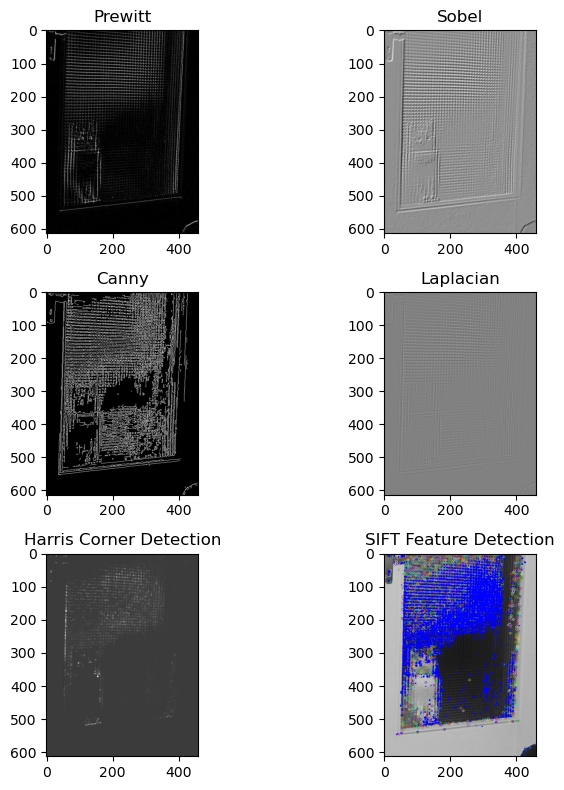

In [20]:
#Displaying greyscale edge images

fig, axs = plt.subplots(3,2, figsize=(8, 8))
axs[0, 0].imshow(prewitt, cmap='gray')
axs[0, 0].set_title('Prewitt')
axs[0, 1].imshow(sobel_eq, cmap='gray')
axs[0, 1].set_title('Sobel')
axs[1, 0].imshow(canny_eq, cmap='gray')
axs[1, 0].set_title('Canny')
axs[1, 1].imshow(laplacian_eq, cmap='gray')
axs[1, 1].set_title('Laplacian')
axs[2, 0].imshow(dst_eq, cmap='gray')
axs[2, 0].set_title('Harris Corner Detection')
axs[2, 1].imshow(img_sift, cmap='gray')
axs[2, 1].set_title('SIFT Feature Detection')
plt.tight_layout()
plt.show()

In [ ]:
#In the case of edge detectors, histogram equalization improved the detection of edges by enhancing the contrast of the image. 
#This is because edge detectors work by detecting changes in intensity, and a more evenly distributed intensity range maked these changes more prominent. 
#As a result, the edges detected in the histogram-equalized image appeared sharper and more well-defined compared to the edges detected in the original grayscale image.

#Similarly, applying histogram equalization to a grayscale image also affected the output of feature detectors such as SIFT. 
#This is because SIFT detects features based on the distribution of gradient orientations around key points, and a more evenly distributed intensity range maked these gradients more prominent. 
#As a result, the SIFT features detected in the histogram-equalized image appeared more distinctive and better suited for image matching and recognition tasks.

#In summary, applying histogram equalization to a grayscale image enhanced the contrast of the image and make changes in intensity and gradient orientations more prominent. 
#This can result in sharper, more well-defined edges and more distinctive feature vectors, which improved the performance of edge and feature detectors.

In [ ]:
#I Kavitha Golla, declare that I have completed this assignment completely and entirely on my own, 
#without any unathorized consultation from others or unathorized access to online websites. 
#I have read the UAB Academic Honor Code and understand that any breach of the UAB Academic Honor Code may result in severe penalties.

#Student Signature/Initials: GK

#Date: 11th March 2023.